In [1]:
import pandas as pd 
import seaborn as sns
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None
from utils import GraphMaker

In [3]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
relevant_cols = ['What was your final grade for 121?', 'Which sector was your first co-op in?']
software_df = class_df[relevant_cols]
software_df.head()

In [ ]:
# add a new software column to the data frame
software_df.loc[:, "Software Coop?"] = ""
software_df.head()

In [ ]:
# function to check if a person is or isn't in software
def in_software(row):
    if row["Which sector was your first co-op in?"] == "Software":
        row["Software Coop?"] = "yes"
    else:
        row["Software Coop?"] = "no"
    
    return row

software_df = software_df.apply(in_software, axis="columns")

software_df.head(20)

In [ ]:
# drop records with missing grades
clean_software_df = software_df.dropna()
clean_software_df.head(20)

In [8]:
# check how many people have a software coop
num_software = clean_software_df.groupby("Software Coop?").count()
num_software

,What was your final grade for 121?,Which sector was your first co-op in?
Software Coop?,,
no,42,42
yes,49,49


In [9]:
# check the average for software coop vs non software coop
software_avg = clean_software_df.groupby("Software Coop?")["What was your final grade for 121?"].mean()
software_avg

Software Coop?
no     89.952381
yes    93.938776
Name: What was your final grade for 121?, dtype: float64

In [10]:
software_median = clean_software_df.groupby("Software Coop?")["What was your final grade for 121?"].median()
software_median

Software Coop?
no     92.0
yes    97.0
Name: What was your final grade for 121?, dtype: float64

Text(0.5, 1.0, '121 Average vs Software Coop')

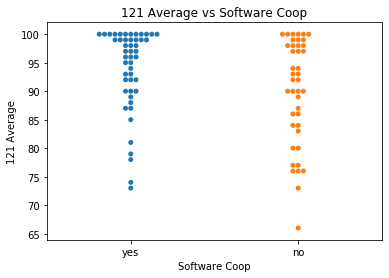

In [11]:
# use a swarm plot to graph the results
ax = sns.swarmplot(x=clean_software_df["Software Coop?"], y=clean_software_df["What was your final grade for 121?"])
ax.set_xlabel("Software Coop")
ax.set_ylabel("121 Average")
ax.set_title("121 Average vs Software Coop")

Text(0.5, 1.0, '121 Grade vs Software Coop')

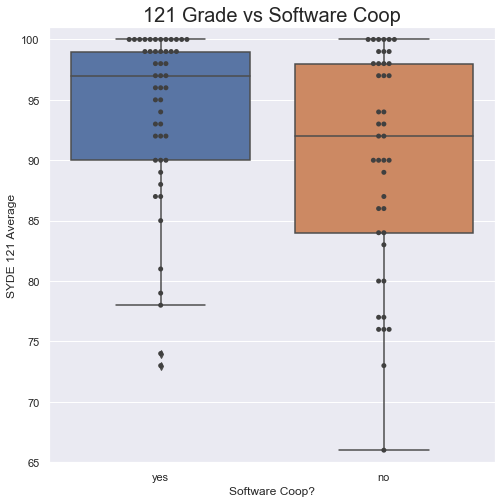

In [12]:
graph_data = GraphMaker(x="Software Coop?", y="What was your final grade for 121?", x_label='Software Coop?', y_label='SYDE 121 Average', data=clean_software_df, title="121 Grade vs Software Coop")
boxplot = graph_data.boxplot(show_points=True, figsize = (8, 8), ylim=(65, 101))
boxplot.set_title("121 Grade vs Software Coop", fontsize=20)

In [13]:
boxplot.figure.savefig('graphs/software_coop_v_121_avg.png')